x:  1  y:  1457.8148418590822
x:  2  y:  1042.8057251886303
x:  3  y:  729.9369015777086
x:  4  y:  358.56680895042143
x:  5  y:  334.74275488439235
x:  6  y:  308.1651478407225
x:  7  y:  288.95213186498364
x:  8  y:  263.81193264769837


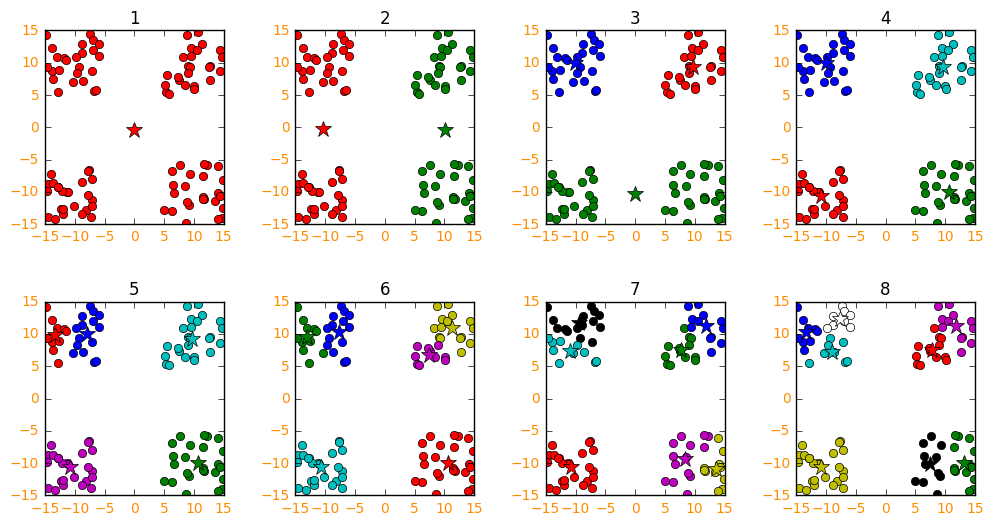

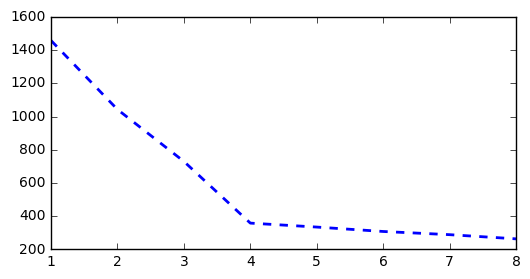

In [2]:
# -*- coding: utf-8 -*-    
from numpy import *  
import time  
import matplotlib.pyplot as plt  
  
  
#随机200个坐标点 (-10~10)  
def getdataSet():  
    dataSet=mat(zeros((100, 2)))  #zeros((100, 2)生成100*2的数组，mat将数组转为矩阵
    numSamples = dataSet.shape[0]    
    offset=[[-10,-10],[-10,10],[10,-10],[10,10]]#分类  
    for i in range(numSamples):  
        dataSet[i] =random.uniform(-5,5)+offset[i%4][0],random.uniform(-5,5)+offset[i%4][1]#偏移  
         
    return dataSet  
  
  
# 欧式距离  
def euclDistance(vector1, vector2):  
    powerNum=power(vector2 - vector1, 2)#求两矩阵差值平方
    return sqrt(sum(powerNum)) #求平方和，并开方 
  
# 总误差  
def getcost(clusterAssment):    
    len = clusterAssment.shape[0]    
    Sum = 0.0    
    for i in range(len):    
        Sum = Sum + clusterAssment[i, 1]    
    return Sum   
  
# 用随机样本初始化centroids ，K表示聚类数
def initCentroids(dataSet, k):    
    numSamples, dim = dataSet.shape    
    centroids = zeros((k + 1, dim))      
    s = set()    
    for i in range(1, k + 1):    
        while True:    
            index = int(random.uniform(0, numSamples)) #随机生成一个样本数量内的index
            #随机数去重  
            if index not in s:    
                s.add(index)    #判断index是否已经取过
                break          
        centroids[i, :] = dataSet[index, :]    #如果inedex未取过值，则将dataset中这一行的数据复制给centroids
    return centroids  
  
# k-means主算法  
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]  
  
    # 第一列存这个样本点属于哪个簇  
    # 第二列存这个样本点和样本中心的误差  
    clusterAssment = mat(zeros((numSamples, 2)))  
    for i in range(numSamples):  
        clusterAssment[i, 0] = -1  
    clusterChanged = True  
  
    # step 1: 初始化centroids  
    #随机从样本数据中取K个聚类点
    centroids = initCentroids(dataSet, k)  
    #print(centroids)
    # 如果收敛完毕，则clusterChanged为False  
    while clusterChanged:  
        clusterChanged = False  
        # 对于每个样本点  
        #遍历每一个样本数据
        for i in range(numSamples):  
            minDist = 0xfffff  
            minIndex = 0  
            # 对于每个样本中心  
            # step 2: 找到里离样本点i最近的聚合点  
            for j in range(1, k + 1):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist = distance  
                    minIndex = j  
  
            # step 3: 更新样本点与聚合点的分配关系  
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist  
            else:  
                clusterAssment[i, 1] = minDist  
  
        # step 4: 更新样本中心       
        for j in range(1, k + 1):  
            #获取样本数据中，与第j个聚合点相近的样本点
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0] == j)[0]]  
            #计算这些样本点的中心点，并将中心点更新到对应聚合点
            centroids[j, :] = mean(pointsInCluster, axis=0)  
    return centroids, clusterAssment  
  
x=[1, 2, 3, 4, 5, 6, 7, 8]    
y=[0, 0, 0, 0, 0, 0, 0, 0]  
  
dataSet =getdataSet()  
#print(dataSet)  #打印测试数据
  
plt.figure('k-means',figsize=(12, 6))   
for index in range(8):        
    k = x[index]   
    centroids, clusterAssment = kmeans(dataSet, k)         
    #print(clusterAssment)  
    y[index]=getcost(clusterAssment)  
    print("x: ",k," y: ",y[index])  
    plt.subplot(2, 4, index+1) 
    #plt.subplot(2, 4, index+1,facecolor=(0.5,0.5,0.5))  
    numSamples, dim = dataSet.shape  
    mark = ['or', 'og', 'ob', 'oc', 'om', 'oy', 'ok', 'ow']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex-1])  
    mark = ['*r', '*g', '*b', '*c', '*m', '*y', '*k', '*w']  
    for i in range(1,k+1):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i-1], markersize = 12)  
    plt.subplots_adjust(wspace=0.4, hspace=0.4)   
    plt.xticks(fontsize=10, color="darkorange")    
    plt.yticks(fontsize=10, color="darkorange")   
    plt.title(index+1)   
plt.figure('K enum',figsize=(6, 3))   
plt.plot(x, y, "b--", linewidth=2)    
plt.show()  
  